# **Machine Learnign Models in PowerBI**

  1.Define the problem and the Model
  2.Data Exploration & Preprocessing
  3.Create the Model
  4.Train the Model

> Indented block


  5.Test the Model
  6.Save the Mode
  7.Import the Model into PowerBI

In [83]:
import pandas as pd

# New Section

In [84]:
car_sale_price=pd.read_csv("C:/Users/saikr/OneDrive/Desktop/Power BI Enterprise DNA/Machine learning with PowerBI/KrO-car-data (1)/car data.csv") #using pandas to read csv and data is read in a dataframe (2D)

In [85]:
car_sale_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [86]:
car_sale_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [87]:
df=car_sale_price

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [89]:
# profile Pandas data
from pandas_profiling import ProfileReport


ModuleNotFoundError: No module named 'pandas_profiling'

In [90]:
df.corr()

C:\Users\saikr\AppData\Local\Temp\ipykernel_12440\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [91]:
import seaborn as sns


C:\Users\saikr\AppData\Local\Temp\ipykernel_12440\935495239.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_corr=sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


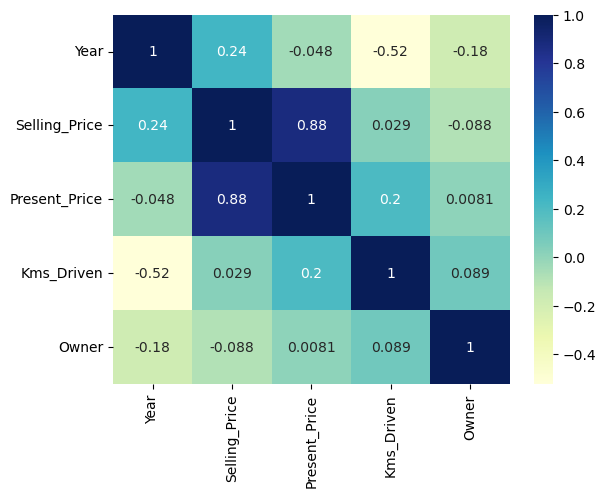

In [92]:

import seaborn as sns
heatmap_corr=sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [93]:
# counting the values of Transmission column
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [94]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [95]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [96]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [97]:
# finding duplicate rows
duplicate_rows=df.duplicated()

In [98]:
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [99]:
# finding duplicate row
duplicate_rows[duplicate_rows]

17    True
93    True
dtype: bool

In [100]:
df=df.drop_duplicates()

In [101]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 299, dtype: bool

In [102]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [103]:
# drop car names as it has too many different names
df=df.drop('Car_Name',axis=1)

In [104]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [105]:
#Create Dummy Variables from our Categorical Features
d_df=pd.get_dummies(df)

In [106]:
d_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


# **Model Creation**

In [107]:
#set our target variable
y=d_df['Selling_Price']
X=d_df.drop('Selling_Price',axis=1)

In [108]:
d_df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [109]:
# bring our model and train test split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [110]:
X.shape

(299, 11)

In [111]:
X_train.shape

(239, 11)

In [112]:
X_test.shape

(60, 11)

In [113]:
y_train.shape

(239,)

In [114]:
y_test.shape

(60,)

In [115]:
y_train

247     5.95
233     3.90
191     0.20
79     14.50
282     8.25
       ...  
83     12.50
264     4.00
8       8.75
159     0.45
278     6.00
Name: Selling_Price, Length: 239, dtype: float64

In [116]:
X_test

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
295,2015,13.090,60076,0,0,1,0,1,0,0,1
63,2015,35.960,47000,0,0,1,0,1,0,1,0
110,2016,1.780,6000,0,0,0,1,0,1,0,1
175,2011,0.787,75000,0,0,0,1,0,1,0,1
163,2010,0.950,27000,0,0,0,1,0,1,0,1
203,2011,4.600,53460,0,0,0,1,1,0,0,1
92,2005,13.700,75000,0,0,0,1,1,0,0,1
283,2016,11.800,9010,0,0,0,1,1,0,0,1
121,2011,1.500,6900,0,0,0,1,0,1,0,1
176,2011,1.050,30000,0,0,0,1,0,1,0,1


In [117]:
X_train

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
247,2015,9.40,36000,0,0,0,1,1,0,0,1
233,2013,5.70,53000,0,0,1,0,1,0,0,1
191,2012,0.57,25000,1,0,0,1,0,1,0,1
79,2012,30.61,89000,0,0,1,0,1,0,1,0
282,2014,14.00,63000,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83,2015,13.46,38000,0,0,1,0,1,0,0,1
264,2015,7.00,40026,0,0,0,1,1,0,0,1
8,2016,8.89,20273,0,0,1,0,1,0,0,1
159,2017,0.51,4000,0,0,0,1,0,1,1,0


In [118]:
model=GradientBoostingRegressor()

In [119]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [122]:
predictions=model.predict(X_test)

In [123]:
predictions

array([10.67166308, 19.21341834,  1.3808768 ,  0.79362722,  0.46920865,
        2.57088698,  4.1826615 ,  7.65209797,  1.02548778,  0.53690038,
        2.79970748,  0.17936485,  1.21699573,  6.81273431,  1.89342759,
        8.60493508,  0.64816682,  2.84259104,  6.87471442,  6.99751724,
        0.80141763,  2.79770392,  8.29377588,  0.42824808,  0.39089487,
        5.37825301,  0.33528067,  6.59407764,  4.52818133,  0.712079  ,
        2.8569231 ,  0.43245699,  5.30894943,  5.98996131,  7.36569099,
        1.47239952,  0.55276049, 20.89182811,  5.46010008,  0.55187143,
        0.62286597,  2.99901176,  9.02824357, 19.28134728,  6.54138595,
        3.90916525,  1.18468185,  0.36702495,  3.99623538,  2.46496327,
        6.92525273,  1.32330787,  8.9534719 ,  3.70085443,  0.45700603,
        0.62394262,  5.64836368,  3.09402016,  4.89305246,  8.56062669])

In [124]:
#Feature importance zipping the columns of data with model_feature importances.
feature_importances = model.feature_importances_

In [127]:
feature_importance_list=pd.DataFrame(zip(d_df.columns,model.feature_importances_),columns=["feature","score"])


# Test the Model

In [128]:
from sklearn.metrics import mean_squared_error,r2_score

In [129]:
r2_score(y_test,predictions)

0.9308707455785579

In [130]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)


In [131]:
scores

array([ 0.96819246,  0.76047892, -1.43606119,  0.95196172,  0.78614997])

In [132]:
#using mean-squared error  as evaluation metric instead of default cross_val_score scoring metric,which i think is R-square.

mean_squared_error(y_test,predictions)

1.8079546655165537

# Save the Model

In [133]:
import pickle

#save the model to disk

file=open('model_Pycaret_best_model_automatic.pkl','wb')
pickle.dump(model,file)
file.close()

In [134]:
# Predict on all of the data as we are convinced model is good.
df['predictions']=model.predict(X)

In [135]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,predictions
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,3.588679
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5.335556
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8.604935
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2.688309
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4.414533


# Visualisation

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\saikr\AppData\Local\Temp\ipykernel_12440\2411010325.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='predictions',shade=True,label='predictions')
C:\Users\saikr\AppData\Local\Temp\ipykernel_12440\2411010325.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='Selling_Price',shade=True,label='Selling_Price')


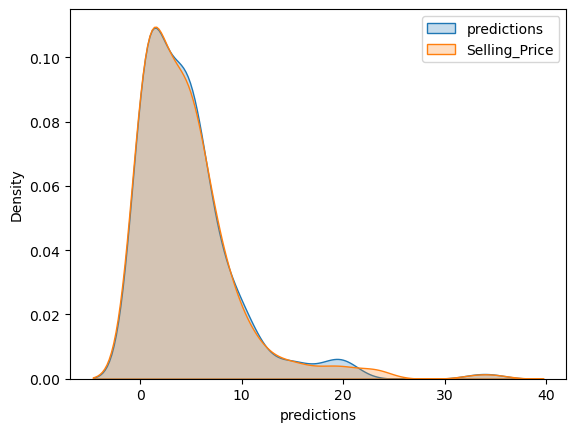

In [137]:
plt.figure()
sns.kdeplot(data=df,x='predictions',shade=True,label='predictions')
sns.kdeplot(data=df,x='Selling_Price',shade=True,label='Selling_Price')
plt.legend()
plt.show()

# AUTOML Approach with PYCARET

In [138]:
#Load in the pycaret library-Automated ML
from pycaret import classification, regression

In [139]:
from pycaret.regression import *

In [140]:
# in Pycarat, we need to tell what the categorical variables are. similar to what we did using pandas get_dummies

df.select_dtypes('object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [141]:
#isolate the categorical features
cat_features=['Fuel_Type', 'Seller_Type', 'Transmission']

In [142]:
#build an expirement
experiment=setup(df,target='Selling_Price',categorical_features=cat_features,n_jobs=1)

,Description,Value
0,Session id,3356
1,Target,Selling_Price
2,Target type,Regression
3,Original data shape,"(299, 9)"
4,Transformed data shape,"(299, 9)"
5,Transformed train set shape,"(209, 9)"
6,Transformed test set shape,"(90, 9)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,3


In [143]:
best_model=compare_models(errors='ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.4196,0.6867,0.7096,0.9735,0.1341,0.2962,0.0460
llar,Lasso Least Angle Regression,0.4196,0.6867,0.7095,0.9735,0.1341,0.2962,0.0490
ridge,Ridge Regression,0.3853,0.5693,0.6751,0.9732,0.1421,0.3344,0.0470
br,Bayesian Ridge,0.3868,0.5752,0.6778,0.9731,0.1430,0.3355,0.0470
lr,Linear Regression,0.3888,0.5714,0.6793,0.9728,0.1463,0.3364,0.0470
en,Elastic Net,0.4568,0.8070,0.7548,0.9711,0.1415,0.3413,0.0470
et,Extra Trees Regressor,0.4832,1.1153,0.9068,0.9616,0.1097,0.1417,0.1320
gbr,Gradient Boosting Regressor,0.5393,1.6222,1.0826,0.9489,0.1139,0.1503,0.0930
rf,Random Forest Regressor,0.5389,1.7650,1.0874,0.9475,0.1151,0.1502,0.1640
huber,Huber Regressor,0.5831,1.6947,1.0114,0.9435,0.1672,0.5344,0.0580


In [144]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.3310,0.3380,0.5814,0.9856,0.0804,0.1439


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,predictions,Selling_Price,prediction_label
120,2016,1.260000,5700,Petrol,Individual,Manual,0,1.084948,1.05,1.216974
136,2014,1.200000,23500,Petrol,Individual,Manual,0,0.649997,0.65,0.757613
198,2011,0.570000,35000,Petrol,Individual,Manual,1,0.185781,0.15,0.273117
297,2015,5.900000,60000,Petrol,Dealer,Manual,0,4.268214,4.00,4.120926
41,2014,3.980000,46706,Petrol,Dealer,Manual,0,2.607013,2.55,2.573324
...,...,...,...,...,...,...,...,...,...,...
240,2012,9.400000,32322,Diesel,Dealer,Manual,0,5.281291,5.35,5.255542
94,2008,22.780001,89000,Petrol,Dealer,Automatic,0,3.959030,4.00,4.290975
142,2015,0.840000,29000,Petrol,Individual,Manual,0,0.604872,0.60,0.686710
118,2015,1.470000,26000,Petrol,Individual,Manual,0,1.184682,1.10,1.250168


In [145]:
save_model(best_model,model_name='light_gradient_boosting')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Present_Price',
                                              'Kms_Driven', 'Owner',
                                              'predictions'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Fuel_Type', 'Seller_Type',
                                              'Transmission'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',...
                                                                      'Transmission'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Fuel_Type',
                                                                  